# Getting to Deep Networks - TensorFlow Network and Training
The objective of this notebook is to go through some of the basics of deep networks.  As one who struggled through Geoff Hinton's class on Coursera, I always felt that perhaps there is a better way.  Geoff of course is brilliant, but his class was a struggle.  A lot of this will spin out of the [Kadenze class](https://www.kadenze.com/courses/creative-applications-of-deep-learning-with-tensorflow-iv/sessions/training-a-network-w-tensorflow), but I am pretty sure that by the time I am done, this is going to be using a lot of different material.

## Gradient Descent
The basic concept of Gradient Descent is to start at some point, calculate the gradient, and then choose a direction that reduces the error in the parameters - that is, we are trying to find the parameters that minimize the error in a function.
In this notebook, we do get into more details on Gradient Descent later.
For the curious, take a look at this [Wiki](https://en.wikipedia.org/wiki/Gradient_descent) and this [Wiki](http://wiki.fast.ai/index.php/Gradient_Descent).  For the mathematics enthusiast, here is Stephen Boyd's [book](https://web.stanford.edu/~boyd/cvxbook/bv_cvxbook.pdf) *Convex Optimization*.

## Neural Network Basics

[Understanding Neurons](http://rpubs.com/jrnorton11/understandingneurons)

[Feed Forward and Back Propagation](https://rpubs.com/jrnorton11/FeedForwardBackPropagation)

See also [Michael Nielsen's online Deep Learning book](http://neuralnetworksanddeeplearning.com/) and [Yoshua Bengio's online book](http://www.deeplearningbook.org/).


## Local Minima
Most nonlinear and polynomial functions of degree 3 or greater will have multiple (local) minima.  To illustrate, let's use some code where define a nonlinear cost function:

Text(0.5,0,'Some Parameter')

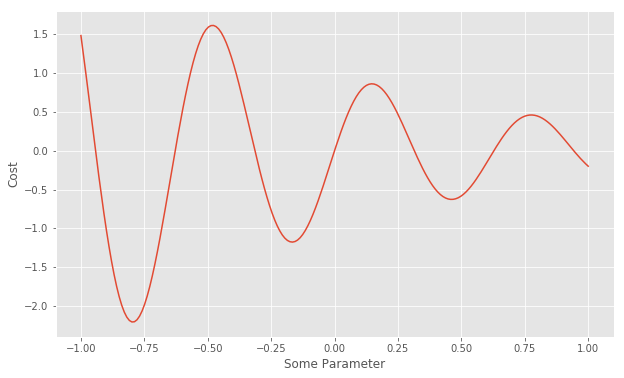

In [1]:
# imports
%matplotlib inline
# %pylab osx
import os
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.colors as colors
import matplotlib.cm as cmx
plt.style.use('ggplot')

fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')

Pictures are great for illustrative purposes, but finding extrema (usually minima) is just going downhill.  Let's estimate a derivative (gradient for multiple dimensions) at some random startpoint and set a learning rate.  Note that in this case, we do not find the global, but rather a local minimum.

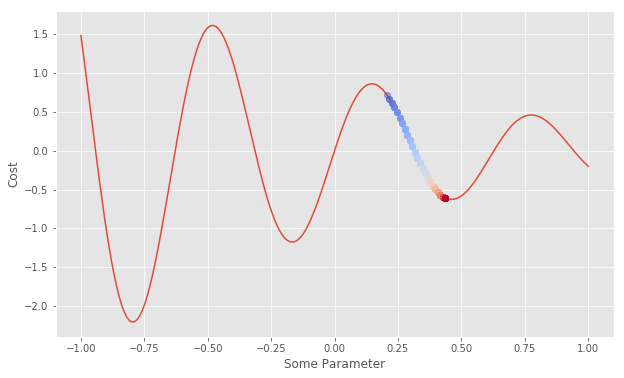

In [2]:
gradient = np.diff(cost)

fig = plt.figure(figsize=(10, 6))
ax = fig.gca()
x = np.linspace(-1, 1, 200)
hz = 10
cost = np.sin(hz*x)*np.exp(-x)
ax.plot(x, cost)
ax.set_ylabel('Cost')
ax.set_xlabel('Some Parameter')
n_iterations = 500
cmap = plt.get_cmap('coolwarm')
c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
learning_rate = 1.0
for iter_i in range(n_iterations):
    iinit_p = int(init_p)
    init_p -= learning_rate * gradient[iinit_p]
    iinit_p = int(init_p)
    ax.plot(x[iinit_p], cost[iinit_p], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

[A little more detail](https://neuralnetworksanddeeplearning-jrnorton11.notebooks.azure.com/nb/notebooks/PlanarDataClassificationWithOneHiddenLayer.ipynb) on gradient descent (from Andrew Ng) and the importance of learning rates:

<img src="images/grad_summary.png" style="width:600px;height:300px;">

**General gradient descent rule**: $ \theta = \theta - \alpha \frac{\partial J }{ \partial \theta }$ where $\alpha$ is the learning rate and $\theta$ represents a parameter.

As an illustration of the difficulty of finding the global minimum, consider the following case.  Note that as the number of parameters grows, say to a million, then finding a local minima will more often than not turn out to be very good minima. That's good news for deep networks as we'll often work with that many parameters.

Text(0.5,0,'Cost')

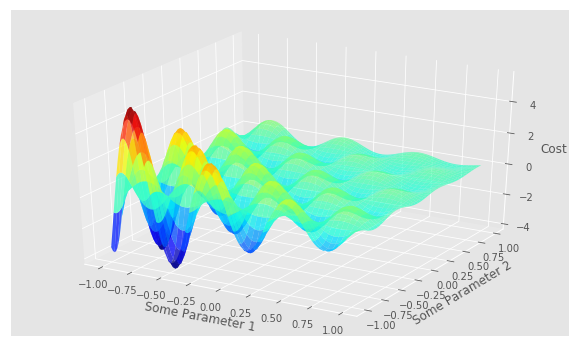

In [3]:
from mpl_toolkits.mplot3d import axes3d
from matplotlib import cm
fig = plt.figure(figsize=(10, 6))
ax = fig.gca(projection='3d')
x, y = np.mgrid[-1:1:0.02, -1:1:0.02]
X, Y, Z = x, y, np.sin(hz*x)*np.exp(-x)*np.cos(hz*y)*np.exp(-y)
ax.plot_surface(X, Y, Z, rstride=2, cstride=2, alpha=0.75, cmap='jet', shade=False)
ax.set_xlabel('Some Parameter 1')
ax.set_ylabel('Some Parameter 2')
ax.set_zlabel('Cost')
# ax.axis('off')

## Learning Rate

The learning rate determines how far along the gradient we should move our parameters? It is often implemented in old school implementations of gradient descent in an algorithm called line search.  What happens for different values of our learning rate?

In the first case, the learning rate is much too small - there is no or very little convergence.  In the second case, just right. In the third case, the learning rate was too large. We get divergence meaning that we overshot our minima, and moved past it. So our cost has the effect of going up and down, instead of just going down like in the second case as we demonstrate in the illustrated gifs following this example.

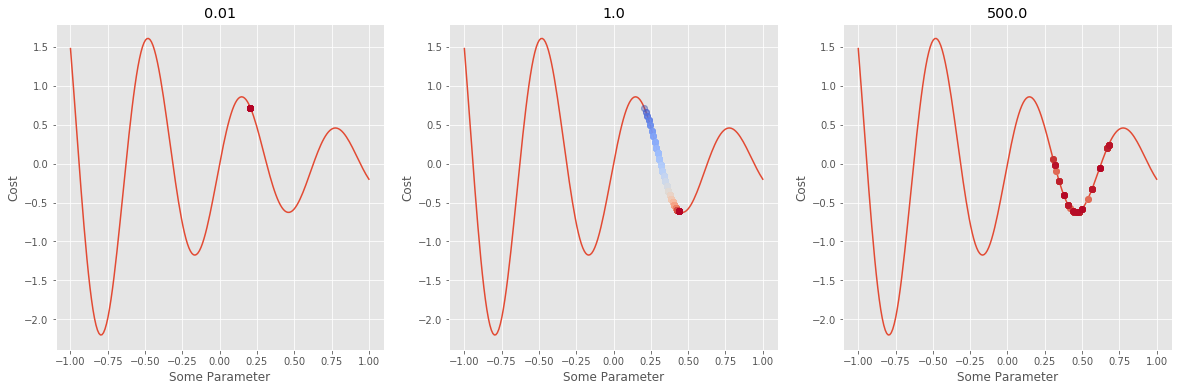

In [4]:
fig, axs = plt.subplots(1, 3, figsize=(20, 6))
for rate_i, learning_rate in enumerate([0.01, 1.0, 500.0]):
    ax = axs[rate_i]
    x = np.linspace(-1, 1, 200)
    hz = 10
    cost = np.sin(hz*x)*np.exp(-x)
    ax.plot(x, cost)
    ax.set_ylabel('Cost')
    ax.set_xlabel('Some Parameter')
    ax.set_title(str(learning_rate))
    n_iterations = 500
    cmap = plt.get_cmap('coolwarm')
    c_norm = colors.Normalize(vmin=0, vmax=n_iterations)
    scalar_map = cmx.ScalarMappable(norm=c_norm, cmap=cmap)
    init_p = 120#np.random.randint(len(x)*0.2, len(x)*0.8)
    for iter_i in range(n_iterations):
        iinit_p = int(init_p)
        init_p -= learning_rate * gradient[iinit_p]
        iinit_p = int(init_p)
        ax.plot(x[iinit_p], cost[iinit_p], 'ro', alpha=(iter_i + 1) / n_iterations, color=scalar_map.to_rgba(iter_i))

**Illustration**: The gradient descent algorithm with a good learning rate (converging) and a bad learning rate (diverging). Images courtesy of Adam Harley.

<img src="images/sgd.gif" style="width:400;height:400;"> <img src="images/sgd_bad.gif" style="width:400;height:400;">

The following techniques will help us out:

* Modify the manifold to be a bit more concave
* Reduce the number of local minima by regularizing the landscape

Using the proper gradient descent algorithm is an important tool in implementing these techniques.

## Understanding Gradient Descent Algorithms

There are three variations of Gradient Descent, batch, stochastic, and minibatch.  I really like how [Sebastian Ruder](http://ruder.io/optimizing-gradient-descent/index.html#batchgradientdescent) lays out the three methods when which combined with a [table](https://machinelearningmastery.com/gentle-introduction-mini-batch-gradient-descent-configure-batch-size/) of strengths and weaknesses, really helps to understand the algorithms much more clearly.

In each case, we start with some training dataset which could be quite large; unlike the old days then, we are computing for multiple points, not just one.

### Batch Gradient Descent (BGD)

Batch Gradient Descent (BGD) is the vanilla version of gradient descent. Let $\theta$ be the model parameters and $J(\theta)$ be the objective or cost function.  $\nabla_{\theta} J(\theta$ is the gradient of the objective function with respect to the parameters.  Let $\eta$ be the learning rate.  BGD computes the gradient of the cost function for all the parameters $\theta$ of the entire traing set (*batch*):

$\theta = \theta - \eta \cdot \nabla_{\theta} J(\theta)$

BGD calculates the gradients for the complete dataset in one update, so it is very slow and intractable for datasets that don't fit in memory.  Neither does it allow for the model to be updated online, i.e., with new examples on the fly.

In code, batch gradient descent looks something like this:

```python
# For some number of epochs
for i in range(nb_epochs):
    # params_grad - the gradient vector of the loss function for the complete dataset
    # w.r.t. the parameter vector params
    params_grad = evaluate_gradient(loss_function, data, params)
    # Update the parameters in the direction of the gradient with the learning_rate.
    params = params - learning_rate * params_grad
```
Modern libraries provide automatic differentiation.  If you derive gradients yourself, [check](http://cs231n.github.io/neural-networks-3/) them.

**Convergence**

BGD is guaranteed to converge to the global minimum for convex error surfaces and to a local minimum for non-convex surfaces (with appropriate choice of the learning rate).

**Upsides**

* Fewer updates to the model means this variant of gradient descent is more computationally efficient than stochastic gradient descent.
* The decreased update frequency results in a more stable error gradient and may result in a more stable convergence on some problems.
* The separation of the calculation of prediction errors and the model update lends the algorithm to parallel processing based implementations.

**Downsides**

* The more stable error gradient may result in premature convergence of the model to a less optimal set of parameters.
* The updates at the end of the training epoch require the additional complexity of accumulating prediction errors across all training examples.
* Commonly, batch gradient descent is implemented in such a way that it requires the entire training dataset in memory and available to the algorithm.
* Model updates, and in turn training speed, may become very slow for large datasets.

### Stochastic Gradient Descent (SGD)

In contrast to BGD, Stochastic Gradient Descent (SGD) performs parameter update for *each* training example $x^{(i)}$ and label $y^{(i)}$:

$\theta = \theta - \eta \cdot \nabla_{\theta} J(\theta: x^{(i)}; y^{(i)})$

BGD performs (reduntantly) recomputes gradients for similar examples before each parameter update. SGD does away with this redundancy by performing one update at a time. It is therefore usually much faster and can also be used to learn online (meaning we can add samples on the fly).
SGD performs frequent updates with a high variance that cause the objective function to fluctuate heavily:

![](https://upload.wikimedia.org/wikipedia/commons/f/f3/Stogra.png)

Its code fragment simply adds a loop over the training examples and evaluates the gradient w.r.t. each example. Note that we shuffle the training data at every epoch as explained in this section.
```python
# For some number of epochs
for i in range(nb_epochs):
    # Shuffle the data
    np.random.shuffle(data)
    # Process one data point at a time
    for example in data:
        params_grad = evaluate_gradient(loss_function, example, params)
        params = params - learning_rate * params_grad
```
**Why shuffle?**
The stochastic refers to the random sample of the data, but why is it important?  Neural networks love order. They will pick up on any order you give it and use that to its advantage, essentially setting up artificial (and incorrect) dependencies. If order of the data is entirely irrelevant to our problem, then the samples should be taken randomly.

In some cases, data should be ordered. For instance, if we want to learn about how something changes over time, like audio, or letters or words in a sequence which form sentences.

**Convergence**

SGD's fluctuation enables it to jump to new and potentially better local minima. On the other hand, this ultimately complicates convergence to the exact minimum, as SGD will keep overshooting. However, by slowly reducing the learning rate SGD achieves the same convergence behaviour as batch gradient descent (almost certainly converging to a local or the global minimum for non-convex and convex optimization respectively).

**Upsides**

* The frequent updates immediately give an insight into the performance of the model and the rate of improvement.
* This variant of gradient descent may be the simplest to understand and implement, especially for beginners.
* The increased model update frequency can result in faster learning on some problems.
* The noisy update process can allow the model to avoid local minima (e.g. premature convergence).

**Downsides**

* Updating the model so frequently is more computationally expensive than other configurations of gradient descent, taking significantly longer to train models on large datasets.
* The frequent updates can result in a noisy gradient signal, which may cause the model parameters and in turn the model error to jump around (have a higher variance over training epochs).
* The noisy learning process down the error gradient can also make it hard for the algorithm to settle on an error minimum for the model.


### Mini-batch Gradient Descent (MGD)

Mini-batch gradient descent takes the best of both worlds and performs an update for every mini-batch of n training examples:

$\theta = \theta - \eta \cdot \nabla_{\theta} J(\theta: x^{(i:i+n)}; y^{(i:i+n)})$

MGD:
* reduces the variance of the parameter updates which can lead to more stable convergence
* uses highly optimized matrix optimizations that make computing the gradient w.r.t. a mini-batch very efficient

Common mini-batch sizes range between 50 and 256, but can vary for different applications. Mini-batch gradient descent is typically the algorithm of choice when training a neural network and the term SGD usually is employed also when mini-batches are used. Note: In modifications of SGD in the rest of this post, we leave out the parameters x(i:i+n);y(i:i+n)

In code, instead of iterating over examples, we now iterate over mini-batches of size 50:

```python
for i in range(nb_epochs):
  np.random.shuffle(data)
  for batch in get_batches(data, batch_size=50):
    params_grad = evaluate_gradient(loss_function, batch, params)
    params = params - learning_rate * params_grad
```

**Upsides**

* The model update frequency is higher than batch gradient descent which allows for a more robust convergence, avoiding local minima.
* The batched updates provide a computationally more efficient process than stochastic gradient descent.
* The batching allows both the efficiency of not having all training data in memory and algorithm implementations.

**Downsides**

* Mini-batch requires the configuration of an additional “mini-batch size” hyperparameter for the learning algorithm.
* Error information must be accumulated across mini-batches of training examples like batch gradient descent.

# Create a Neural Network

### Data

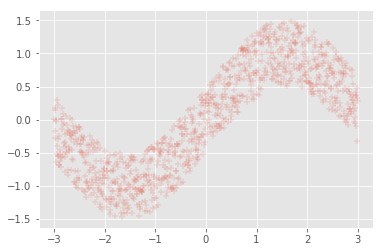

In [5]:
# Sample data:
# We are going to say that we have seen 1000 values of some underlying representation that we aim to discover
n_observations = 1000
# Instead of having an image as our input, we're going to have values from -3 to 3.
# This is going to be the input to our network.
xs = np.linspace(-3, 3, n_observations)

# From this input, we're going to teach our network to represent a function that looks like a sine wave.
# To make it difficult, we are going to create a noisy representation of a sine wave by adding uniform
# noise.  So our true representation is a sine wave, but we are going to make it difficult by adding some
# noise to the function, and try to have our algorithm discover the underlying cause of the data, which
# is the sine wave without any noise.
ys = np.sin(xs) + np.random.uniform(-0.5, 0.5, n_observations)
plt.scatter(xs, ys, alpha=0.15, marker='+')

The objective is to train a network where given any value on the $x$ axis, calculate the value on the $y$ axis. That is the fundamental idea of regression: Predicting some continuous output value given some continuous input value.

### Define Cost Function

Note the use of placeholders.

In [6]:
# variables which we need to fill in when we are ready to compute the graph.
# We'll pass in the values of the x-axis to a placeholder called X.
X = tf.placeholder(tf.float32, name='X')

# And we'll also specify what the y values should be using another placeholder, y.
Y = tf.placeholder(tf.float32, name='Y')

At some point, we will center and scale our input values once they are assigned.  Start the TensorFlow interactive session.  Generate a random normal data set using the tensorflow random_normal function.

(array([   7.,   39.,   77.,  155.,  224.,  243.,  153.,   74.,   25.,    3.]),
 array([-0.29156166, -0.23186887, -0.17217607, -0.11248328, -0.05279049,
         0.00690231,  0.0665951 ,  0.1262879 ,  0.18598069,  0.24567348,
         0.30536628]),
 <a list of 10 Patch objects>)

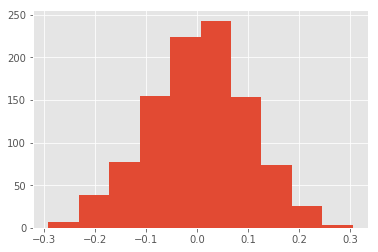

In [7]:
sess = tf.InteractiveSession()

# No standarad deviation set...
# n = tf.random_normal([1000]).eval()
# Set a standard deviation
n = tf.random_normal([1000], stddev=0.1).eval()

plt.hist(n)

In [8]:
# To create the variables, we'll use tf.Variable, which unlike a placeholder, does not require us
# to define the value at the start of a run/eval.  It does need an initial value, which we'll give
# right now using the function tf.random_normal.  We could also pass an initializer, which is simply
# a function which will call the same function.  We'll see how that works a bit later.  In any case,
# the random_normal function just says, give me a random value from the "normal" curve.  We pass that
# value to a tf.Variable which creates a tensor object.
W = tf.Variable(tf.random_normal([1], dtype=tf.float32, stddev=0.1), name='weight')

# For bias variables, we usually start with a constant value of 0.
B = tf.Variable(tf.constant([0], dtype=tf.float32), name='bias')

# Now we can scale our input placeholder by W, and add our bias, b.
Y_pred = X * W + B

**Cost Function Strategy**

We use gradient descent to calculate optimal values for $W$ and $b$. This requires us to define a cost function to measure distane.  In this case, we transform our in $x$, $-3 \ge x \ge 3$ to match a known value, $Y$, $Y \in \sin(u)$, $-1 \ge u \ge 1$ (u is a dummy variable).  Define a Python function to measure distance:

In [9]:
# this function will measure the absolute distance, also known as the l1-norm
def distance(p1, p2):
    return tf.abs(p1 - p2)

# and now we can take the output of our network and our known target value
# and ask for the distance between them
cost = distance(Y_pred, tf.sin(X))

Recall that we used the sine function to define the true values of $Y$.  Since we almost never know that function, we use $Y$ instead of sine where $Y$ is the true value.

In [10]:
cost = distance(Y_pred, Y)

Recall that cost is calculated not just on one point, but on many points, e.g., 50-100 points at a time.  We write our cost function as:

In [11]:
cost = tf.reduce_mean(distance(Y_pred, Y))

## Training Parameters

Define an optimizer working on the cost function so that we may find (learn) the parameters which give the optimum (best) answer.  We tell the optimizer to minimize our cost variable which measures the distance between the prediction and actual Y value. The optimizer knows how to calculate the gradient and follow it in the negative direction to find the smallest value, and handles updating all variables!

In [12]:
optimizer = tf.train.GradientDescentOptimizer(learning_rate=0.01).minimize(cost)

Iteratively run the optimizer in TensorFlow.

0.633874
0.511031
0.455794
0.431766
0.420302
0.414926
0.411847
0.410559
0.410053
0.409906
0.409832
0.409793
0.409767
0.409742
0.409718


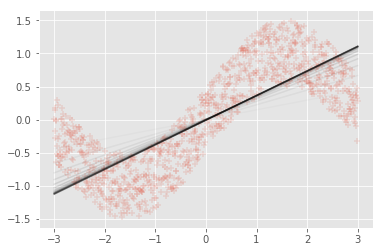

In [13]:
# We create a session to use the graph
n_iterations = 500

# Plot the true data distribution
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set `W` and `b` to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        sess.run(optimizer, feed_dict={X: xs, Y: ys})
        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        # every 10 iterations
        if it_i % 10 == 0:
            # let's plot the x versus the predicted y
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)

            # We'll draw points as a scatter plot just like before
            # Except we'll also scale the alpha value so that it gets
            # darker as the iterations get closer to the end
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            #fig.show()
            plt.draw()

            # And let's print our training cost: mean of absolute differences
            print(training_cost)

        # Allow the training to quit if we've reached a minimum
        if np.abs(prev_training_cost - training_cost) < 0.000001:
            break

        # Keep track of the training cost
        prev_training_cost = training_cost

At this point, you have to be asking yourself why do I only get a line as the optimal curve?  Hint: there are just not enough parameters for a curve.  We need more parameters - we need to add more neurons to the model.  First however, lets randomly shuffle the data and simulate a mini-batch gradient descent.

0.592087
0.491381
0.447685
0.427899
0.418517
0.413884
0.411373
0.41039
0.409999
0.409886
0.409823
0.409787
0.409762
0.409736
0.409712
0.409705
0.409699
0.409693
0.409691
0.40969
0.40969
0.40969
0.40969
0.40969
0.409689
0.40969
0.409689
0.40969
0.40969
0.409689
0.409689
0.409689
0.40969
0.40969
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689
0.409689


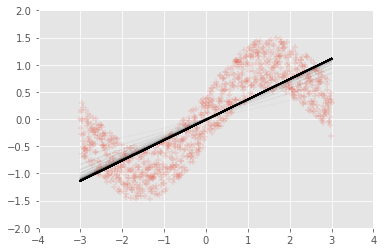

In [14]:
batch_size = 1000
fig, ax = plt.subplots(1, 1)
ax.scatter(xs, ys, alpha=0.15, marker='+')
ax.set_xlim([-4, 4])
ax.set_ylim([-2, 2])
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # If we had used tf.random_normal_initializer or tf.constant_intitializer,
    # then this would have set `W` and `b` to their initial values.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

        if it_i % 10 == 0:
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
            print(training_cost)
#fig.show()
plt.draw()

We've randomized the input, but we still have only enough neurons if you will to only do a linear fit.  First, let's put our training code in a function.

In [15]:
def train(X, Y, Y_pred, n_iterations=100, batch_size=200, learning_rate=0.02):
    cost = tf.reduce_mean(distance(Y_pred, Y))
    optimizer = tf.train.GradientDescentOptimizer(learning_rate).minimize(cost)
    fig, ax = plt.subplots(1, 1)
    ax.scatter(xs, ys, alpha=0.15, marker='+')
    ax.set_xlim([-4, 4])
    ax.set_ylim([-2, 2])
    with tf.Session() as sess:
        # Here we tell tensorflow that we want to initialize all
        # the variables in the graph so we can use them
        # This will set W and b to their initial random normal value.
        sess.run(tf.global_variables_initializer())

        # We now run a loop over epochs
        prev_training_cost = 0.0
        for it_i in range(n_iterations):
            idxs = np.random.permutation(range(len(xs)))
            n_batches = len(idxs) // batch_size
            for batch_i in range(n_batches):
                idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
                sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

            training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})

            if it_i % 10 == 0:
                ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
                ax.plot(xs, ys_pred, 'k', alpha=it_i / n_iterations)
                print(training_cost)
    #fig.show()
    plt.draw()

Create a model with 100 neurons.  Note that we are adding them in a linear regression model - so they are not going to do us much good yet...

3.57201
3.07557
3.2272
2.50975
2.93057
2.12275
2.44088
2.7404
2.68193
2.14626


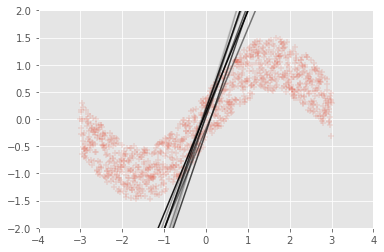

In [16]:
# We're going to multiply our input by 100 values, creating an "inner layer"
# of 100 neurons.
n_neurons = 100
W = tf.Variable(tf.random_normal([1, n_neurons], stddev=0.1))

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]))

# Instead of multiplying directly, we use tf.matmul to perform a
# matrix multiplication
h = tf.matmul(tf.expand_dims(X, 1), W) + b

# Create the operation to add every neuron's output
Y_pred = tf.reduce_sum(h, 1)

# Retrain with our new Y_pred
train(X, Y, Y_pred)

Note that the cost is going up and down, instead of just down. That's a good sign that we should reduce the learning rate.

# Under and Overfitting

One way to try to represent a sine curve is with polynomials.  The tendancy is to try to increase the degree of the polynomial until, well, why not just try something real high?  That leads to overfitting and it is the quintessential rookie mistake.

Trying to use a real small degree leads to underfitting.  While less prone to "wiggles", it is still not appropriate.

In the end, we may just want to use a different representation.

0.932132
0.647911
0.463511
0.385705
0.362699
0.475288
0.591231
0.498273
0.548151
0.431655


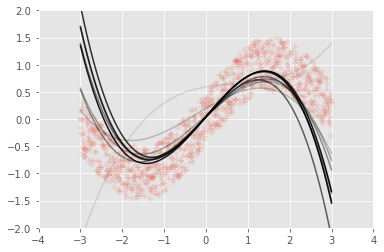

In [17]:
# Instead of a single factor and a bias, we'll create a polynomial function
# of different degrees.  We will then learn the influence that each
# degree of the input (X^0, X^1, X^2, ...) has on the final output (Y).
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 4):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

Add one more power and we see what overfitting does.  If fact, numerically this is so unstable that I get different answers from time to time.

1.75327
1.22901
3.94004
3.48735
3.83807
2.46128
0.883024
1.13133
1.39489
0.861986


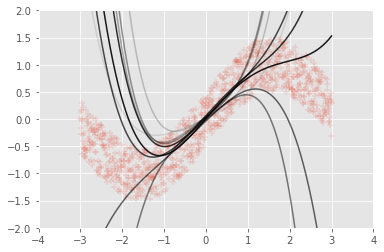

In [18]:
Y_pred = tf.Variable(tf.random_normal([1]), name='bias')
for pow_i in range(0, 5):
    W = tf.Variable(
        tf.random_normal([1], stddev=0.1), name='weight_%d' % pow_i)
    Y_pred = tf.add(tf.multiply(tf.pow(X, pow_i), W), Y_pred)

# And then we'll retrain with our new Y_pred
train(X, Y, Y_pred)

## Introducing Nonlinearities / Activation Function

Polynomial regression is still a linear regression as we have shown elsewhere.  We need to add non-linearity, specifically a non-linear function called an activation function.  We introduced activation functions in discussing the basics of a neural network, e.g., the sigmoid function.  Activation functions are a really essential ingredient to any deep network. Practically every complex deep learning algorithm performs a series of linear, followed by nonlinear operations. By stacking sets of these, the complexity and power of expression grows far greater than any linear equation could.

We'll typically make use of one of three non-linearities for the rest of this course: tanh, sigmoid, and relu.  These activation functions turn on or off depending on the outcome - to some extent mimicking what neurons in our brain do.

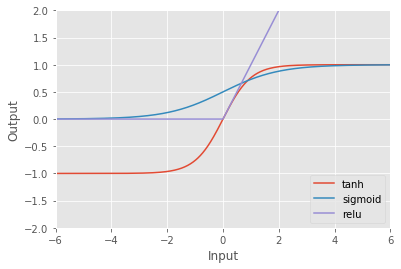

In [19]:
sess = tf.InteractiveSession()
x = np.linspace(-6,6,1000)
plt.plot(x, tf.nn.tanh(x).eval(), label='tanh')
plt.plot(x, tf.nn.sigmoid(x).eval(), label='sigmoid')
plt.plot(x, tf.nn.relu(x).eval(), label='relu')
plt.legend(loc='lower right')
plt.xlim([-6, 6])
plt.ylim([-2, 2])
plt.xlabel('Input')
plt.ylabel('Output')
plt.grid('on')

Build a network with activation functions.

1.37865
0.476371
0.433346
0.395126
0.363028
0.337891
0.320087
0.310181
0.30246
0.296852


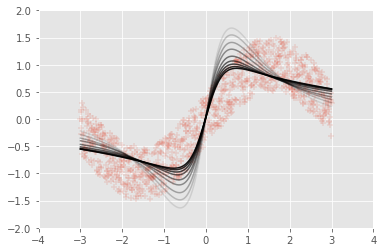

In [20]:
# We're going to multiply our input by 10 values, creating an "inner layer"
# of n_neurons neurons.
n_neurons = 10
W = tf.Variable(tf.random_normal([1, n_neurons]), name='W')

# and allow for n_neurons additions on each of those neurons
b = tf.Variable(tf.constant(0, dtype=tf.float32, shape=[n_neurons]), name='b')

# Instead of just multiplying, we'll put our n_neuron multiplications through a non-linearity, the tanh function.
h = tf.nn.tanh(tf.matmul(tf.expand_dims(X, 1), W) + b, name='h')

Y_pred = tf.reduce_sum(h, 1)

# And retrain w/ our new Y_pred
train(X, Y, Y_pred)

That's pretty good.  

I really want to look at the neural network.  I found this wonderful little goodie through [StackOverflow](https://stackoverflow.com/questions/38189119/simple-way-to-visualize-a-tensorflow-graph-in-jupyter) which leads to Alex Mordvintsev's [deep dream notebook](https://github.com/tensorflow/tensorflow/blob/master/tensorflow/examples/tutorials/deepdream/deepdream.ipynb). And that is a notebook which I am going to have to study because deepdream is cool - in fact Alex's [website](http://znah.net/) just looks like a treasure trove.

In [39]:
from IPython.display import clear_output, Image, display, HTML

def strip_consts(graph_def, max_const_size=32):
    """Strip large constant values from graph_def."""
    strip_def = tf.GraphDef()
    for n0 in graph_def.node:
        n = strip_def.node.add() 
        n.MergeFrom(n0)
        if n.op == 'Const':
            tensor = n.attr['value'].tensor
            size = len(tensor.tensor_content)
            if size > max_const_size:
                tensor.tensor_content = tf.compat.as_bytes("<stripped %d bytes>"%size)
    return strip_def
 
def show_graph(graph_def, max_const_size=32):
    """Visualize TensorFlow graph."""
    if hasattr(graph_def, 'as_graph_def'):
        graph_def = graph_def.as_graph_def()
    strip_def = strip_consts(graph_def, max_const_size=max_const_size)
    code = """
        <script>
          function load() {{
            document.getElementById("{id}").pbtxt = {data};
          }}
        </script>
        <link rel="import" href="https://tensorboard.appspot.com/tf-graph-basic.build.html" onload=load()>
        <div style="height:600px">
          <tf-graph-basic id="{id}"></tf-graph-basic>
        </div>
    """.format(data=repr(str(strip_def)), id='graph'+str(np.random.rand()))
  
    iframe = """
        <iframe seamless style="width:800px;height:620px;border:0" srcdoc="{}"></iframe>
    """.format(code.replace('"', '&quot;'))
    display(HTML(iframe))

In [22]:
show_graph(tf.get_default_graph().as_graph_def())

That certainly shows how quickly things get complicated in nets.  This is a *fully-connected network*, since everything is connected to everything else, meaning every neuron is multiplied by every single input value. This is also sometimes called a linear layer, since we are linearly combining the values of the input to create the resulting neuron.  Multiplying our input by a matrix, adding a bias, and then applying a non-linearity is something we'll need to do a lot.

In [23]:
# A function for creating a fully-connected network
def linear(X, n_input, n_output, activation=None):
    W = tf.Variable(tf.random_normal([n_input, n_output], stddev=0.1), name='W')
    b = tf.Variable(
        tf.constant(0, dtype=tf.float32, shape=[n_output]), name='b')
    h = tf.nn.tanh(tf.matmul(X, W) + b, name='h')
    return h

Clear the existing graph and inspect the tensorflow graph.

In [24]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10)

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'random_normal/shape',
 'random_normal/mean',
 'random_normal/stddev',
 'random_normal/RandomStandardNormal',
 'random_normal/mul',
 'random_normal',
 'W',
 'W/Assign',
 'W/read',
 'Const',
 'b',
 'b/Assign',
 'b/read',
 'MatMul',
 'add',
 'h']

The names of the variables in this network aren't very helpful. We can actually do a much better job here by creating our variables within scopes:

In [25]:
def linear(X, n_input, n_output, activation=None, scope=None):
    with tf.variable_scope(scope or "linear"):
        W = tf.get_variable(
            name='W',
            shape=[n_input, n_output],
            initializer=tf.random_normal_initializer(mean=0.0, stddev=0.1))
        b = tf.get_variable(
            name='b',
            shape=[n_output],
            initializer=tf.constant_initializer())
        h = tf.matmul(X, W) + b
        if activation is not None:
            h = activation(h)
        return h

We've also moved from using a single random value, to using an initializer. This initializer will create a new random value every time we call `python sess.run(tf.global_variables_initializer())`. We also pass some more sensible values for the initial mean and standard deviation.

In [26]:
# first clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# let's get the current graph
g = tf.get_default_graph()

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

# let's create a new network
X = tf.placeholder(tf.float32, name='X')
h = linear(X, 2, 10, scope='layer1')

# See the names of any operations in the graph
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add']

In [27]:
# Let's connect the output of our last network to another one!

# Wow we just made a Deep Network!  Let's make it deeper!
h2 = linear(h, 10, 10, scope='layer2')

# Again!
h3 = linear(h2, 10, 3, scope='layer3')

# Now when we look at the names of the operations in the graph, we can directly see which operations belong to each layer!
[op.name for op in tf.get_default_graph().get_operations()]

['X',
 'layer1/W/Initializer/random_normal/shape',
 'layer1/W/Initializer/random_normal/mean',
 'layer1/W/Initializer/random_normal/stddev',
 'layer1/W/Initializer/random_normal/RandomStandardNormal',
 'layer1/W/Initializer/random_normal/mul',
 'layer1/W/Initializer/random_normal',
 'layer1/W',
 'layer1/W/Assign',
 'layer1/W/read',
 'layer1/b/Initializer/Const',
 'layer1/b',
 'layer1/b/Assign',
 'layer1/b/read',
 'layer1/MatMul',
 'layer1/add',
 'layer2/W/Initializer/random_normal/shape',
 'layer2/W/Initializer/random_normal/mean',
 'layer2/W/Initializer/random_normal/stddev',
 'layer2/W/Initializer/random_normal/RandomStandardNormal',
 'layer2/W/Initializer/random_normal/mul',
 'layer2/W/Initializer/random_normal',
 'layer2/W',
 'layer2/W/Assign',
 'layer2/W/read',
 'layer2/b/Initializer/Const',
 'layer2/b',
 'layer2/b/Assign',
 'layer2/b/read',
 'layer2/MatMul',
 'layer2/add',
 'layer3/W/Initializer/random_normal/shape',
 'layer3/W/Initializer/random_normal/mean',
 'layer3/W/Initiali

In [28]:
show_graph(tf.get_default_graph().as_graph_def())

In [29]:
# Clear the graph
from tensorflow.python.framework import ops
ops.reset_default_graph()

# Image Inpainting

**Description**

Now we've got most of the tools we'll need to perform much more complicated tasks. We'll first explore a fun application: painting an image. This network is just meant to demonstrate how the previous networks we've learned can be scaled to more complicated tasks without much modification.

We'll follow an example that Andrej Karpathy has [done](https://arxiv.org/pdf/1801.05585.pdf) in his [online demonstration](https://deepai.org/machine-learning-model/inpainting) of "image inpainting". Let's first get an image that we'll try to teach a neural network to paint.  Any Zappa fans should check [this](https://accraze.info/frank-zappa-neural-nets/) out.

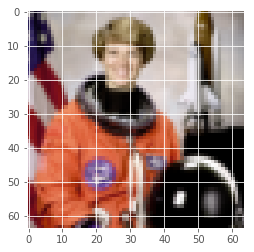

In [30]:
from skimage.data import astronaut
from scipy.misc import imresize
img = imresize(astronaut(), (64, 64))
plt.imshow(img)

Teach a network to go from the location on an image frame to a particular color, that is, given any position in an image, determine what color to paint. Despite the seeming complexity of this task, it is remarkably similar to what we've just done.

In [31]:
# We'll first collect all the positions in the image in our list, xs
xs = []

# And the corresponding colors for each of these positions
ys = []

# Now loop over the image
for row_i in range(img.shape[0]):
    for col_i in range(img.shape[1]):
        # And store the inputs
        xs.append([row_i, col_i])
        # And outputs that the network needs to learn to predict
        ys.append(img[row_i, col_i])

# we'll convert our lists to arrays
xs = np.array(xs)
ys = np.array(ys)

# Normalizing the input by the mean and standard deviation
xs = (xs - np.mean(xs)) / np.std(xs)

# and print the shapes
xs.shape, ys.shape

((4096, 2), (4096, 3))

Use regression to predict the value of a pixel given its (row, col) position.

**Input:**  X = (row, col) value  
**Output:** Y = (r, g, b).

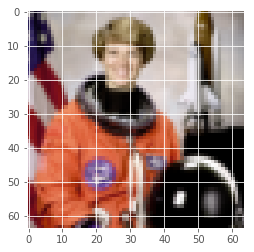

In [32]:
# Get the original image back by reshaping the colors back into the original image shape
plt.imshow(ys.reshape(img.shape))

Before, we had a scalar input and a sclar output; now we will use vectors. Tensorflow can handle any number of values we give it, so this is actually a pretty simple modification to the network definition. We'll stick with the convention of using the variable X to denote the input to the network, and Y to denote the output of the network.

In [33]:
X = tf.placeholder(tf.float32, shape=[None, 2], name='X')
Y = tf.placeholder(tf.float32, shape=[None, 3], name='Y')

## Build a Deep (Neural) Net

Instead of having a single fully connected layer, we'll have many layers. We'll make use of a for loop to simplify the creation of the network.

In [34]:
n_neurons = [2, 64, 64, 64, 64, 64, 64, 3]

current_input = X
for layer_i in range(1, len(n_neurons)):
    current_input = linear(
        X=current_input,
        n_input=n_neurons[layer_i - 1],
        n_output=n_neurons[layer_i],
        activation=tf.nn.relu if (layer_i+1) < len(n_neurons) else None,
        scope='layer_' + str(layer_i))
Y_pred = current_input

In [35]:
show_graph(tf.get_default_graph().as_graph_def())

In [36]:
# The cost function sums the error on the three (R,G,B) values
cost = tf.reduce_mean(
    tf.reduce_sum(distance(Y_pred, Y), 1))

Use the [AdamOptimizer](https://arxiv.org/abs/1412.6980) which in general performs better than the original GradientDescentOptimizer. It's pretty similar, except it has some tricks to help with gradient descent. If not working with sequential data or building a recurrent network, it will probably always work better than just using GradientDescent.

Then we will run the code which is similar to the previous code.  It will take some time to run, but in the end, note how the original image is much recovered.

In [37]:
optimizer = tf.train.AdamOptimizer(0.001).minimize(cost)

0 169.894
1 158.745
2 152.985
3 146.682
4 144.833
5 142.214
6 138.775
7 136.104
8 135.059
9 133.633
10 134.228
11 129.409
12 128.657
13 128.235
14 126.165
15 125.793
16 120.995
17 114.102
18 112.411
19 108.605
20 107.382
21 114.206
22 104.951
23 103.125
24 103.713
25 103.013
26 100.144
27 101.194
28 99.5408
29 97.2878
30 97.6905
31 95.3209
32 94.6773
33 96.2639
34 94.8134
35 94.2911
36 94.9117
37 92.8816
38 96.9639
39 94.8808
40 91.3098
41 91.6564
42 91.9657
43 90.1512
44 92.8416
45 92.2244
46 91.8781
47 90.8265
48 91.2265
49 96.1067
50 94.0303
51 92.0426
52 89.5874
53 89.0322
54 90.4889
55 86.2892
56 88.1121
57 87.0297
58 90.2627
59 86.0443
60 95.275
61 87.8906
62 86.9763
63 90.9137
64 84.1357
65 85.4151
66 86.0281
67 83.7953
68 83.2962
69 84.3407
70 84.6718
71 83.5847
72 82.0979
73 86.1325
74 80.9152
75 84.141
76 82.1584
77 79.2415
78 81.2265
79 80.8464
80 78.1793
81 80.5771
82 77.992
83 77.5322
84 78.5571
85 81.9965
86 77.4335
87 80.6183
88 78.1296
89 78.1595
90 74.9801
91 76.0394
9

700 32.9448
701 33.7319
702 32.7735
703 33.8902
704 32.6767
705 32.5462
706 33.4708
707 31.6853
708 36.0076
709 33.9033
710 34.1945
711 35.1727
712 34.9592
713 33.7334
714 34.4277
715 34.5445
716 34.3871
717 36.3029
718 34.5265
719 31.8565
720 31.8119
721 33.0232
722 33.6294
723 32.9913
724 33.4636
725 32.3444
726 34.8697
727 32.4004
728 33.074
729 33.1062
730 31.9973
731 34.9353
732 35.4974
733 34.5708
734 32.9197
735 31.3289
736 32.2058
737 38.0257
738 32.8929
739 33.5975
740 33.8791
741 31.2118
742 32.1334
743 34.821
744 33.2288
745 33.2368
746 34.2756
747 32.7248
748 32.1177
749 35.9321
750 33.7404
751 31.274
752 33.5989
753 32.6136
754 32.3285
755 34.0919
756 33.95
757 32.8018
758 32.8922
759 33.7975
760 33.9033
761 32.4533
762 32.4669
763 33.9745
764 39.5057
765 31.5793
766 31.6296
767 32.4752
768 30.026
769 31.8805
770 31.3793
771 33.2968
772 30.0776
773 32.8236
774 32.5142
775 30.6311
776 32.2339
777 32.0183
778 32.6358
779 31.9162
780 32.1603
781 32.007
782 32.6174
783 31.652


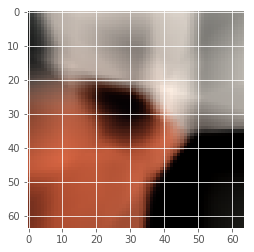

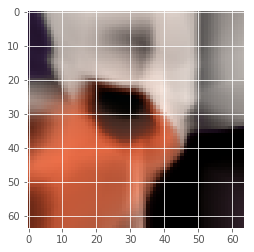

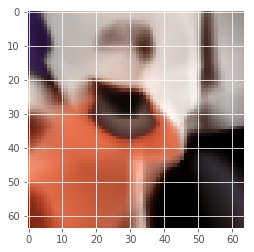

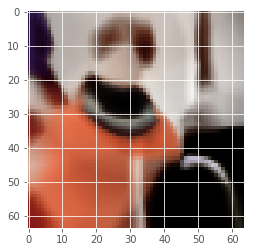

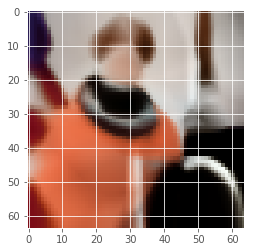

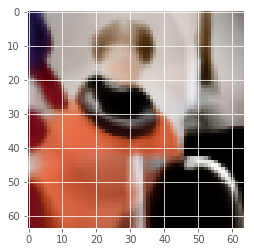

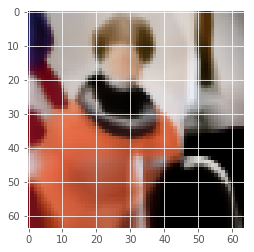

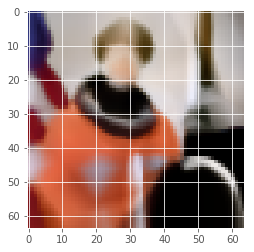

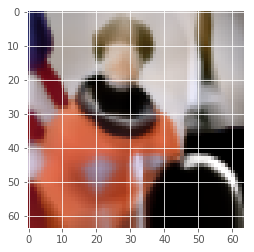

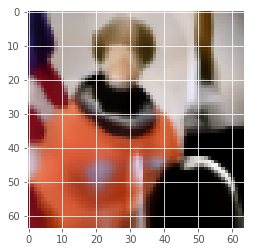

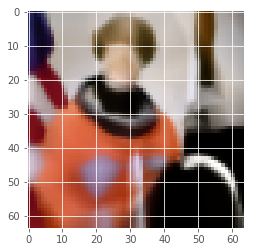

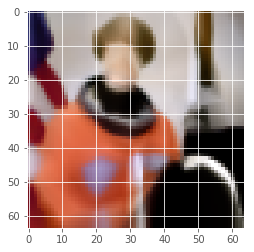

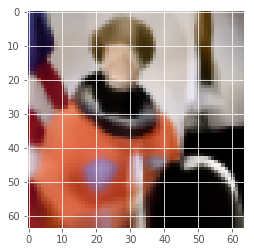

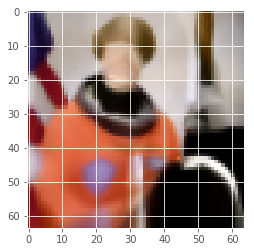

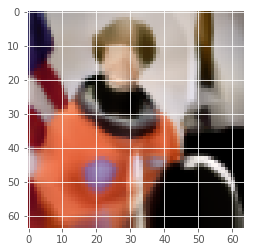

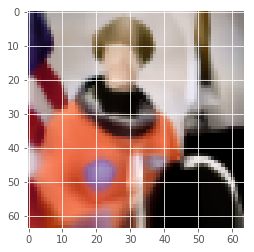

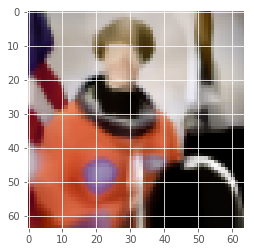

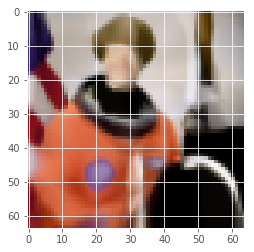

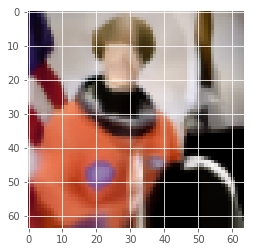

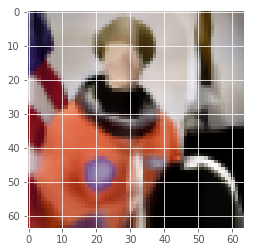

In [38]:
# This code will take a while to run...
n_iterations = 800
batch_size = 50

# Create a session to iterate over chunks of the training data
with tf.Session() as sess:
    # Here we tell tensorflow that we want to initialize all
    # the variables in the graph so we can use them
    # This will set W and b to their initial random normal value.
    sess.run(tf.global_variables_initializer())

    # We now run a loop over epochs
    prev_training_cost = 0.0
    for it_i in range(n_iterations):
        idxs = np.random.permutation(range(len(xs)))
        n_batches = len(idxs) // batch_size
        for batch_i in range(n_batches):
            idxs_i = idxs[batch_i * batch_size: (batch_i + 1) * batch_size]
            sess.run(optimizer, feed_dict={X: xs[idxs_i], Y: ys[idxs_i]})

        training_cost = sess.run(cost, feed_dict={X: xs, Y: ys})
        print(it_i, training_cost)

        # After some iterations, draw the predicted image
        if (it_i + 1) % 40 == 0:
            # By evaluating the predicted image tensor and give it every image to predict (the xs rray)
            ys_pred = Y_pred.eval(feed_dict={X: xs}, session=sess)
            fig, ax = plt.subplots(1, 1)
            img = np.clip(ys_pred.reshape(img.shape), 0, 255).astype(np.uint8)
            plt.imshow(img)

# Yet More Reading
Cauchy, Augustin (1847). Méthode générale pour la résolution des systèmes d'équations simultanées. pp. 536–538.

H. Robinds and S. Monro, “A stochastic approximation method,” Annals of Mathematical Statistics, vol. 22, pp. 400–407, 1951.

Sutton, R. S. (1986). Two problems with backpropagation and other steepest-descent learning procedures for networks. Proc. 8th Annual Conf. Cognitive Science Society.

Yann Lecun. Efficient BackProp. 1998. http://yann.lecun.com/exdb/publis/pdf/lecun-98b.pdf

Kingma, D. P., & Ba, J. L. (2015). Adam: a Method for Stochastic Optimization. International Conference on Learning Representations, 1–13.

J. Schmidhuber. Deep Learning in Neural Networks: An Overview. Neural Networks, 61, p 85-117, 2015.

Deep AI Image Recognition.  https://deepai.org/ai-image-processing

Mordvintsev, Alexander.  http://znah.net/.  See also [Google Scholar](https://scholar.google.ch/citations?user=A_HbzQMAAAAJ&hl=en) for his papers and [this interesting story](https://www.wired.com/2015/12/inside-deep-dreams-how-google-made-its-computers-go-crazy/).